In [1]:
import os
import numpy as np
import networkx as nx
import pandas as pd
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from collections import defaultdict
from tqdm import tqdm

In [2]:
from Weighted_KShell_Decomposition import wkshell_decomposition

In [3]:
import warnings
warnings.filterwarnings('ignore')

['bus_stops_wszone.dbf', 'bus_stops_wszone.shp', 'singstat', 'net_202001_15.net', 'OD_bus', 'net_202001_05.net', 'net_202001_06.net', 'origin_destination_train_201912.csv.xz', 'train_station_wszone.prj', 'origin_destination_train_202001.csv.xz', 'train_station_wszone.dbf', 'OD_202001_weekend.csv.xz', 'net_202001_22.net', 'subzone_centroid.csv', 'OD_201912_weekday.csv.xz', 'origin_destination_bus_201911.csv.xz', 'net_202001_19.net', 'net_202001_18.net', 'train_station_wszone.cpg', 'OD_PT', 'train_station_wszone.shx', 'net_202001_10.net', 'OD_201911_weekend.csv.xz', 'origin_destination_train_201911.csv.xz', 'planning-area-2014', 'net_202001_weekend.net', 'subzone_centroid_pos.json', '.ipynb_checkpoints', 'net_202001_21.net', 'origin_destination_bus_202001.csv.xz', 'OD_201912_weekend.csv.xz', 'net_202001_07.net', 'origin_destination_bus_201912.csv.xz', 'net_202001_23.net', 'region-2014', 'train_station_wszone.shp', 'net_202001_weekday.net', 'net_202001_16.net', 'OD_train', 'bus_stops_wszo

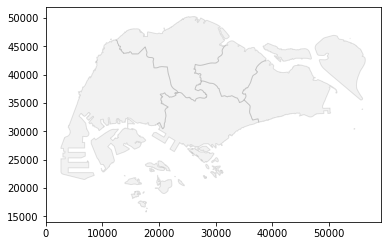

In [4]:
data_dir = "../data"
print(os.listdir(data_dir))

#os.listdir("../data")
region = gpd.read_file("../data/region-2014/MP14_REGION_WEB_PL.shp")
region.plot(color="grey", edgecolor="k", alpha=0.1)

In [5]:
#region.unary_union()

In [6]:
with open(os.path.join("../data", 'subzone_centroid_pos.json'), 'r') as fread:
    pos = json.load(fread)
pos["MARINA SOUTH"]

[31595.83574613999, 29220.18737674884]

data

In [7]:
day = "weekday" # "weekend"
fp = os.path.join(data_dir, "net_202001_{}.net".format(day))
dg1 = nx.read_pajek(fp)
dg1.number_of_nodes(), dg1.number_of_edges()

(303, 30043)

In [8]:
day = "weekend"
fp2 = os.path.join(data_dir, "net_202001_{}.net".format(day))
dg2 = nx.read_pajek(fp2)
dg2.number_of_nodes(), dg2.number_of_edges()

(303, 30043)

run k-shell decomposition

In [8]:
node_ks_weekday = wkshell_decomposition(dg1.copy(), direction="in", alpha=1., beta=1., filter_edge_weight=None, group_k_by=1, normalize_edges_by_median=False)
node_ks_weekday2 = wkshell_decomposition(dg1.copy(), direction="out", alpha=1., beta=1., filter_edge_weight=None, group_k_by=1, normalize_edges_by_median=False)

100%|██████████| 303/303 [00:02<00:00, 147.01it/s]


In [9]:
node_ks_weekend = wkshell_decomposition(dg2.copy(), direction="in", alpha=1., beta=1., filter_edge_weight=None, group_k_by=1, normalize_edges_by_median=False)
node_ks_weekend2 = wkshell_decomposition(dg2.copy(), direction="out", alpha=1., beta=1., filter_edge_weight=None, group_k_by=1, normalize_edges_by_median=False)

100%|██████████| 303/303 [00:02<00:00, 139.03it/s]


In [11]:
df_ks = pd.DataFrame.from_dict({"weekday_in_core":node_ks_weekday, "weekday_out_core":node_ks_weekday2, 
                                "weekend_in_core":node_ks_weekend, "weekend_out_core":node_ks_weekend2})
#df_ks.head()

Text(0, 0.5, 'out core')

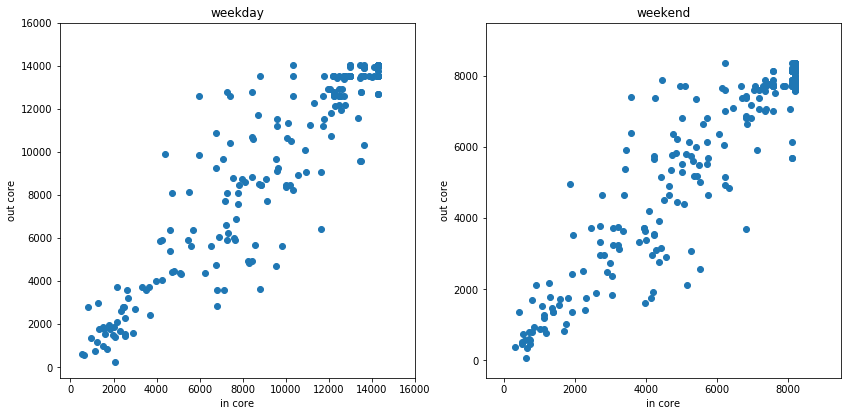

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(14,7), sharex=False, sharey=False)
axs[0].scatter(df_ks["weekday_in_core"], df_ks["weekday_out_core"])
axs[0].set_aspect("equal")
axs[0].set_title("weekday")
axs[0].set_xlim([-500, 16000])
axs[0].set_ylim([-500, 16000])
axs[0].set_xlabel("in core")
axs[0].set_ylabel("out core")

axs[1].scatter(df_ks["weekend_in_core"], df_ks["weekend_out_core"])
axs[1].set_aspect("equal")
axs[1].set_title("weekend")
axs[1].set_xlim([-500, 9500])
axs[1].set_ylim([-500, 9500])
axs[1].set_xlabel("in core")
axs[1].set_ylabel("out core")

Text(0, 0.5, 'out core')

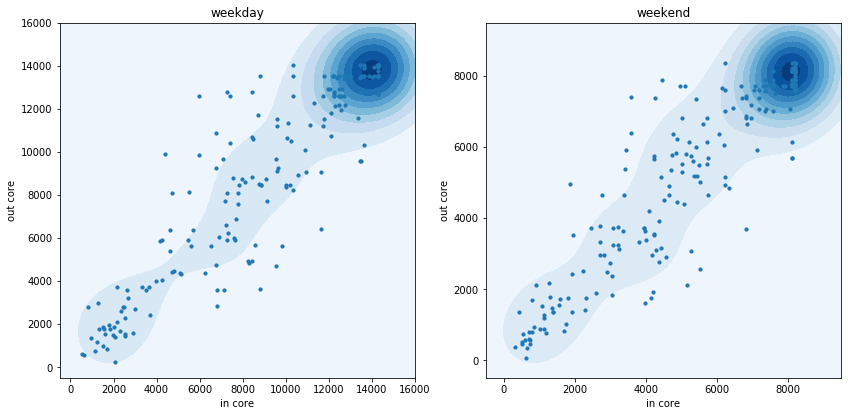

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(14,7), sharex=False, sharey=False)
sns.kdeplot(df_ks["weekday_in_core"], df_ks["weekday_out_core"], ax=axs[0],
                 cmap="Blues", shade=True, shade_lowest=True)
axs[0].scatter(df_ks["weekday_in_core"], df_ks["weekday_out_core"], s=10)
axs[0].set_aspect("equal")
axs[0].set_title("weekday")
axs[0].set_xlim([-500, 16000])
axs[0].set_ylim([-500, 16000])
axs[0].set_xlabel("in core")
axs[0].set_ylabel("out core")

sns.kdeplot(df_ks["weekend_in_core"], df_ks["weekend_out_core"], ax=axs[1],
                 cmap="Blues", shade=True, shade_lowest=True)
axs[1].scatter(df_ks["weekend_in_core"], df_ks["weekend_out_core"], s=10)
axs[1].set_aspect("equal")
axs[1].set_title("weekend")
axs[1].set_xlim([-500, 9500])
axs[1].set_ylim([-500, 9500])
axs[1].set_xlabel("in core")
axs[1].set_ylabel("out core")

In [15]:
df_ks = df_ks.reset_index()
df_ks= df_ks.rename(columns={"index": "node"})
df_ks.head()

,node,weekday_in_core,weekday_out_core,weekend_in_core,weekend_out_core
0,ADMIRALTY,8845,8436,5350,5185
1,AIRPORT ROAD,2153,2070,515,500
2,ALEXANDRA HILL,14278,14023,8195,8136
3,ALEXANDRA NORTH,5717,6379,2838,2951
4,ALJUNIED,14278,14023,8195,8377


In [16]:
df_ks.to_csv("k_shell_decomposition_result.csv", index_label="ind")

In [17]:
df_ks = pd.read_csv("k_shell_decomposition_result.csv", index_col=0)
df_ks.head()

,node,weekday_in_core,weekday_out_core,weekend_in_core,weekend_out_core
ind,,,,,
0,ADMIRALTY,8845,8436,5350,5185
1,AIRPORT ROAD,2153,2070,515,500
2,ALEXANDRA HILL,14278,14023,8195,8136
3,ALEXANDRA NORTH,5717,6379,2838,2951
4,ALJUNIED,14278,14023,8195,8377


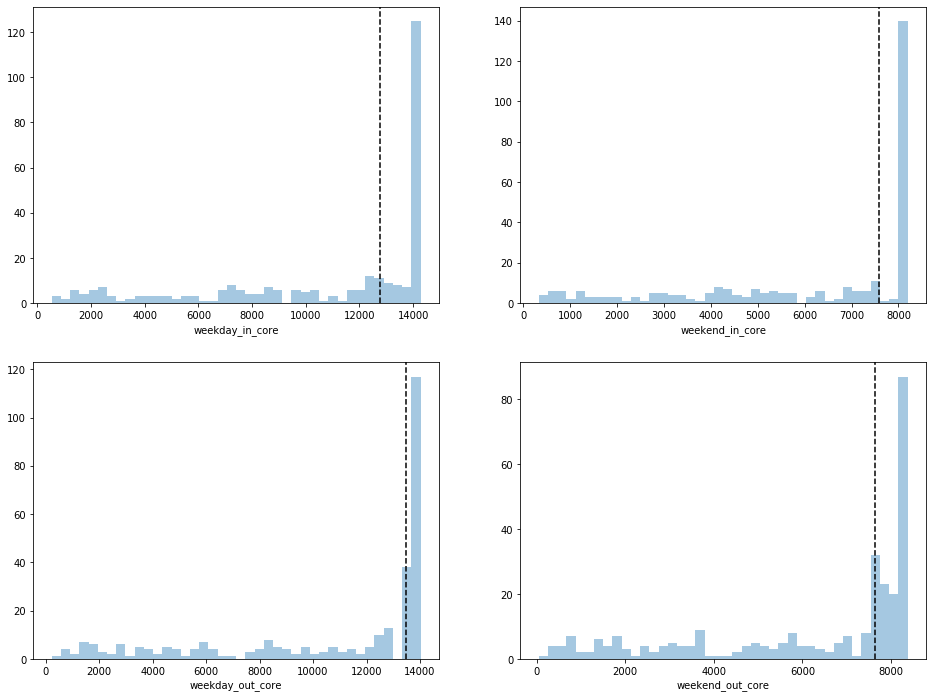

In [18]:
fig, axg = plt.subplots(2,2, figsize=(16,12))
axs = axg.flatten()
cols = ["weekday_in_core", "weekend_in_core", "weekday_out_core", "weekend_out_core"]

for i in range(4):
    ax = axs[i]
    vals = df_ks[cols[i]]
    sns.distplot(vals, kde=False, ax=ax, bins = 40)
    ax.axvline(x=np.median(vals), ls="--", c="k")

In [19]:
def quantile(alist, cut=4):
    b0 = 1./cut
    bs = [ i*b0 for i in range(1, cut+1) ]
    breaks = [ np.quantile(alist, b) for b in bs ]
    print(bs, breaks)
    break_list = []
    for a in alist:
        
        i = 0
        while not(a<=breaks[i]):
            i+=1
        """
        i = cut-1
        while not(a>=breaks[i]):
            i-=1
        """
        break_list.append(i)
        
    return break_list


In [20]:
#temp = df_ks[df_ks["weekday_in_core"]<max(df_ks["weekday_in_core"])]["weekday_in_core"]

lvl_1 = quantile(df_ks["weekday_in_core"], cut=2)
check_1 = [ lvl_1.count(i) for i in sorted(list(set(lvl_1))) ], sorted(list(set(lvl_1)))

lvl_2 = quantile(df_ks["weekday_out_core"], cut=2)
check_2 = [ lvl_2.count(i) for i in sorted(list(set(lvl_2))) ], sorted(list(set(lvl_2)))

lvl_3 = quantile(df_ks["weekend_in_core"], cut=2)
check_3 = [ lvl_3.count(i) for i in sorted(list(set(lvl_3))) ], sorted(list(set(lvl_3)))

lvl_4 = quantile(df_ks["weekend_out_core"], cut=2)
check_4 = [ lvl_4.count(i) for i in sorted(list(set(lvl_4))) ], sorted(list(set(lvl_4)))

print(check_1)
print(check_2)
print(check_3)
print(check_4)

[0.5, 1.0] [12758.0, 14278.0]
[0.5, 1.0] [13463.0, 14023.0]
[0.5, 1.0] [7591.0, 8195.0]
[0.5, 1.0] [7644.0, 8377.0]
([152, 151], [0, 1])
([152, 151], [0, 1])
([160, 143], [0, 1])
([152, 151], [0, 1])


In [21]:
df_ks["weekday_in_core_lvl"] = lvl_1
df_ks["weekday_out_core_lvl"] = lvl_2
df_ks["weekend_in_core_lvl"] = lvl_3
df_ks["weekend_out_core_lvl"] = lvl_4

In [24]:
df_ks.head()

,node,weekday_in_core,weekday_out_core,weekend_in_core,weekend_out_core,weekday_in_core_lvl,weekday_out_core_lvl,weekend_in_core_lvl,weekend_out_core_lvl
ind,,,,,,,,,
0,ADMIRALTY,8845,8436,5350,5185,0,0,0,0
1,AIRPORT ROAD,2153,2070,515,500,0,0,0,0
2,ALEXANDRA HILL,14278,14023,8195,8136,1,1,1,1
3,ALEXANDRA NORTH,5717,6379,2838,2951,0,0,0,0
4,ALJUNIED,14278,14023,8195,8377,1,1,1,1


In [27]:
df_ks.to_csv("k_shell_decomposition_result_wlvl.csv", index_label="ind")

In [26]:
df_ks[df_ks["node"]=="YISHUN CENTRAL"]

,node,weekday_in_core,weekday_out_core,weekend_in_core,weekend_out_core,weekday_in_core_lvl,weekday_out_core_lvl,weekend_in_core_lvl,weekend_out_core_lvl
ind,,,,,,,,,
296,YISHUN CENTRAL,14278,14023,8195,8377,1,1,1,1


In [7]:
df_ks = pd.read_csv("k_shell_decomposition_result_wlvl.csv", index_col=0)

In [8]:
subzone_fp = os.path.join(data_dir, "subzone-2014", "MP14_SUBZONE_WEB_PL.shp")
subzone = gpd.read_file(subzone_fp)
subzone.head()

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,1,MARINA SOUTH,MSSZ01,Y,MARINA SOUTH,MS,CENTRAL REGION,CR,5ED7EB253F99252E,2014-12-05,31595.8357,29220.1873,5267.381024,1.630379e+06,"POLYGON ((31495.560 30140.012, 31980.957 29671..."
1,2,1,PEARL'S HILL,OTSZ01,Y,OUTRAM,OT,CENTRAL REGION,CR,8C7149B9EB32EEFC,2014-12-05,28679.0634,29782.0519,3506.107376,5.598162e+05,"POLYGON ((29092.275 30021.888, 29119.641 30006..."
2,3,3,BOAT QUAY,SRSZ03,Y,SINGAPORE RIVER,SR,CENTRAL REGION,CR,C35FEFF02B13E0E5,2014-12-05,29654.9594,29974.6553,1740.925766,1.608075e+05,"POLYGON ((29932.332 29879.120, 29947.317 29858..."
3,4,8,HENDERSON HILL,BMSZ08,N,BUKIT MERAH,BM,CENTRAL REGION,CR,3775D82C5DDBEFBD,2014-12-05,26782.8261,29933.7651,3313.624904,5.954289e+05,"POLYGON ((27131.276 30059.727, 27088.334 29709..."
4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,2014-12-05,26201.9580,30005.7035,2825.594099,3.874294e+05,"POLYGON ((26451.027 30396.458, 26440.474 30361..."


In [9]:
subzone2 = subzone.merge(df_ks, left_on="SUBZONE_N", right_on="node", )
len(subzone2), len(subzone)

(303, 323)

In [10]:
subzone2.head()

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,...,geometry,node,weekday_in_core,weekday_out_core,weekend_in_core,weekend_out_core,weekday_in_core_lvl,weekday_out_core_lvl,weekend_in_core_lvl,weekend_out_core_lvl
0,1,1,MARINA SOUTH,MSSZ01,Y,MARINA SOUTH,MS,CENTRAL REGION,CR,5ED7EB253F99252E,...,"POLYGON ((31495.560 30140.012, 31980.957 29671...",MARINA SOUTH,633,576,517,456,0,0,0,0
1,2,1,PEARL'S HILL,OTSZ01,Y,OUTRAM,OT,CENTRAL REGION,CR,8C7149B9EB32EEFC,...,"POLYGON ((29092.275 30021.888, 29119.641 30006...",PEARL'S HILL,12981,13524,7591,8136,1,1,0,1
2,3,3,BOAT QUAY,SRSZ03,Y,SINGAPORE RIVER,SR,CENTRAL REGION,CR,C35FEFF02B13E0E5,...,"POLYGON ((29932.332 29879.120, 29947.317 29858...",BOAT QUAY,11644,6418,6823,3701,0,0,0,0
3,4,8,HENDERSON HILL,BMSZ08,N,BUKIT MERAH,BM,CENTRAL REGION,CR,3775D82C5DDBEFBD,...,"POLYGON ((27131.276 30059.727, 27088.334 29709...",HENDERSON HILL,14278,14023,8195,8136,1,1,1,1
4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,...,"POLYGON ((26451.027 30396.458, 26440.474 30361...",REDHILL,14278,14023,8195,8136,1,1,1,1


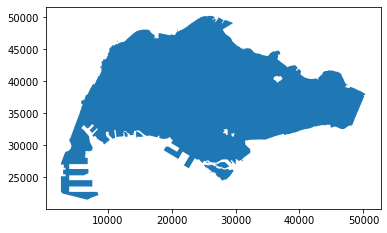

In [11]:
union_geom = gpd.GeoSeries(subzone2.geometry.unary_union)
union_geom.plot()

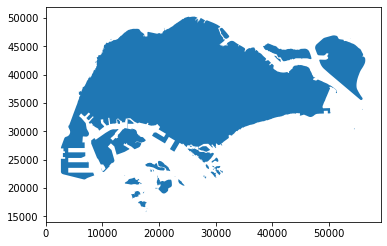

In [12]:
union_geom = gpd.GeoSeries(region.geometry.unary_union)
union_geom.plot()

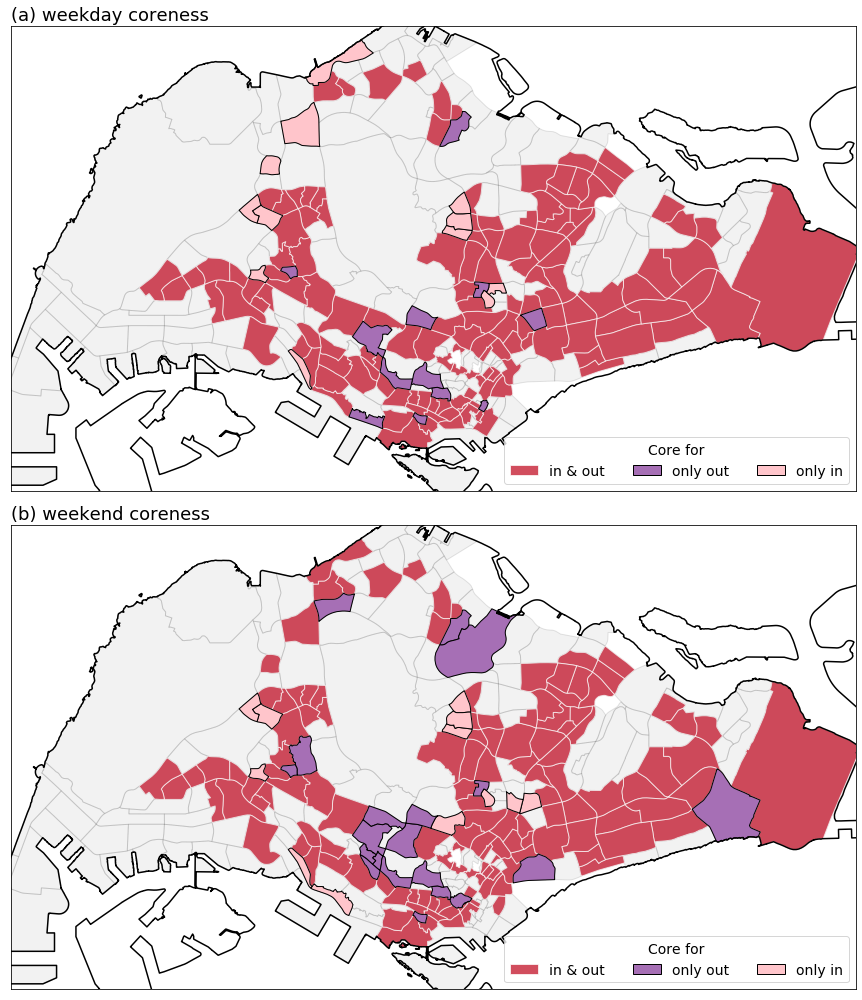

In [15]:
fig, axs = plt.subplots(2,1, figsize=(14,14))


for ax in axs:
    subzone2.plot(color="grey", edgecolor="k", alpha=0.1, ax=ax)
    #region.plot(color="none", edgecolor="k", alpha=0.8, ax=ax)

colors = ["xkcd:scarlet", "xkcd:light rose", "xkcd:soft purple"]

temp1 = subzone2[subzone2["weekday_in_core_lvl"]==1]
temp1 = temp1[temp1["weekday_out_core_lvl"]==1]
temp1.plot(ax=axs[0], fc=colors[0], ec="w", alpha=.7)

temp2 = subzone2[subzone2["weekday_in_core_lvl"]==1]
temp2 = temp2[temp2["weekday_out_core_lvl"]==0]
temp2.plot(ax=axs[0], fc=colors[1], ec="k", lw=1)

temp3 = subzone2[subzone2["weekday_out_core_lvl"]==1]
temp3 = temp3[temp3["weekday_in_core_lvl"]==0]
temp3.plot(ax=axs[0], fc=colors[2], ec="k", lw=1)



temp1 = subzone2[subzone2["weekend_in_core_lvl"]==1]
temp1 = temp1[temp1["weekend_out_core_lvl"]==1]
temp1.plot(ax=axs[1], fc=colors[0], ec="w", alpha=.7)

temp2 = subzone2[subzone2["weekend_in_core_lvl"]==1]
temp2 = temp2[temp2["weekend_out_core_lvl"]==0]
temp2.plot(ax=axs[1], fc=colors[1], ec="k", lw=1)

temp3 = subzone2[subzone2["weekend_out_core_lvl"]==1]
temp3 = temp3[temp3["weekend_in_core_lvl"]==0]
temp3.plot(ax=axs[1], fc=colors[2], ec="k", lw=1)

i = 0
labs = "ab"
labs2 = ["weekday coreness", "weekend coreness"]
for ax in axs:
    union_geom.plot(fc="none", ec="k", lw=1.5, ax=ax)
    ax.set_xlim([4500,50000])
    ax.set_ylim([25000,50000])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("({}) {}".format(labs[i], labs2[i]), loc="left", fontsize=18)
    patches1 = []
    patches1.append(mpatches.Patch(color=colors[0], ec="w", label="in & out", alpha=.7))
    patches1.append(mpatches.Patch(color=colors[2], ec="k", lw=1, label="only out", alpha=1.))
    patches1.append(mpatches.Patch(color=colors[1], ec="k", lw=1, label="only in", alpha=1.))
    leg1 = ax.legend(handles=patches1, ncol=3, fontsize=14, loc="lower right")
    leg1.set_title("Core for", prop={'size':14})
    i+=1



plt.tight_layout()
plt.savefig("figs/kshell_result.png", dpi=100, bbox_inches="tight")